# Plotting Redbox

A place to draw the root graph as it exists in code.

In [6]:
from redbox.graph.root import get_root_graph
from redbox.models.settings import Settings, ElasticLocalSettings
from pathlib import Path
from dotenv import load_dotenv, dotenv_values
from langchain_openai import AzureChatOpenAI
import tiktoken
from core_api.dependencies import get_parameterised_retriever, get_all_chunks_retriever, get_embedding_model

_ = load_dotenv(Path.cwd().parent / ".env")

ENV = Settings(
    minio_host="localhost", 
    object_store="minio", 
    elastic=ElasticLocalSettings(host="localhost"),
)

llm = AzureChatOpenAI(
    api_key=ENV.azure_openai_api_key_4o,
    azure_endpoint=ENV.azure_openai_endpoint_4o,
    model="gpt-4o",
)

In [9]:
app = get_root_graph(
    parameterised_retriever=get_parameterised_retriever(ENV, get_embedding_model(ENV)),
    all_chunks_retriever=get_all_chunks_retriever(ENV)
)

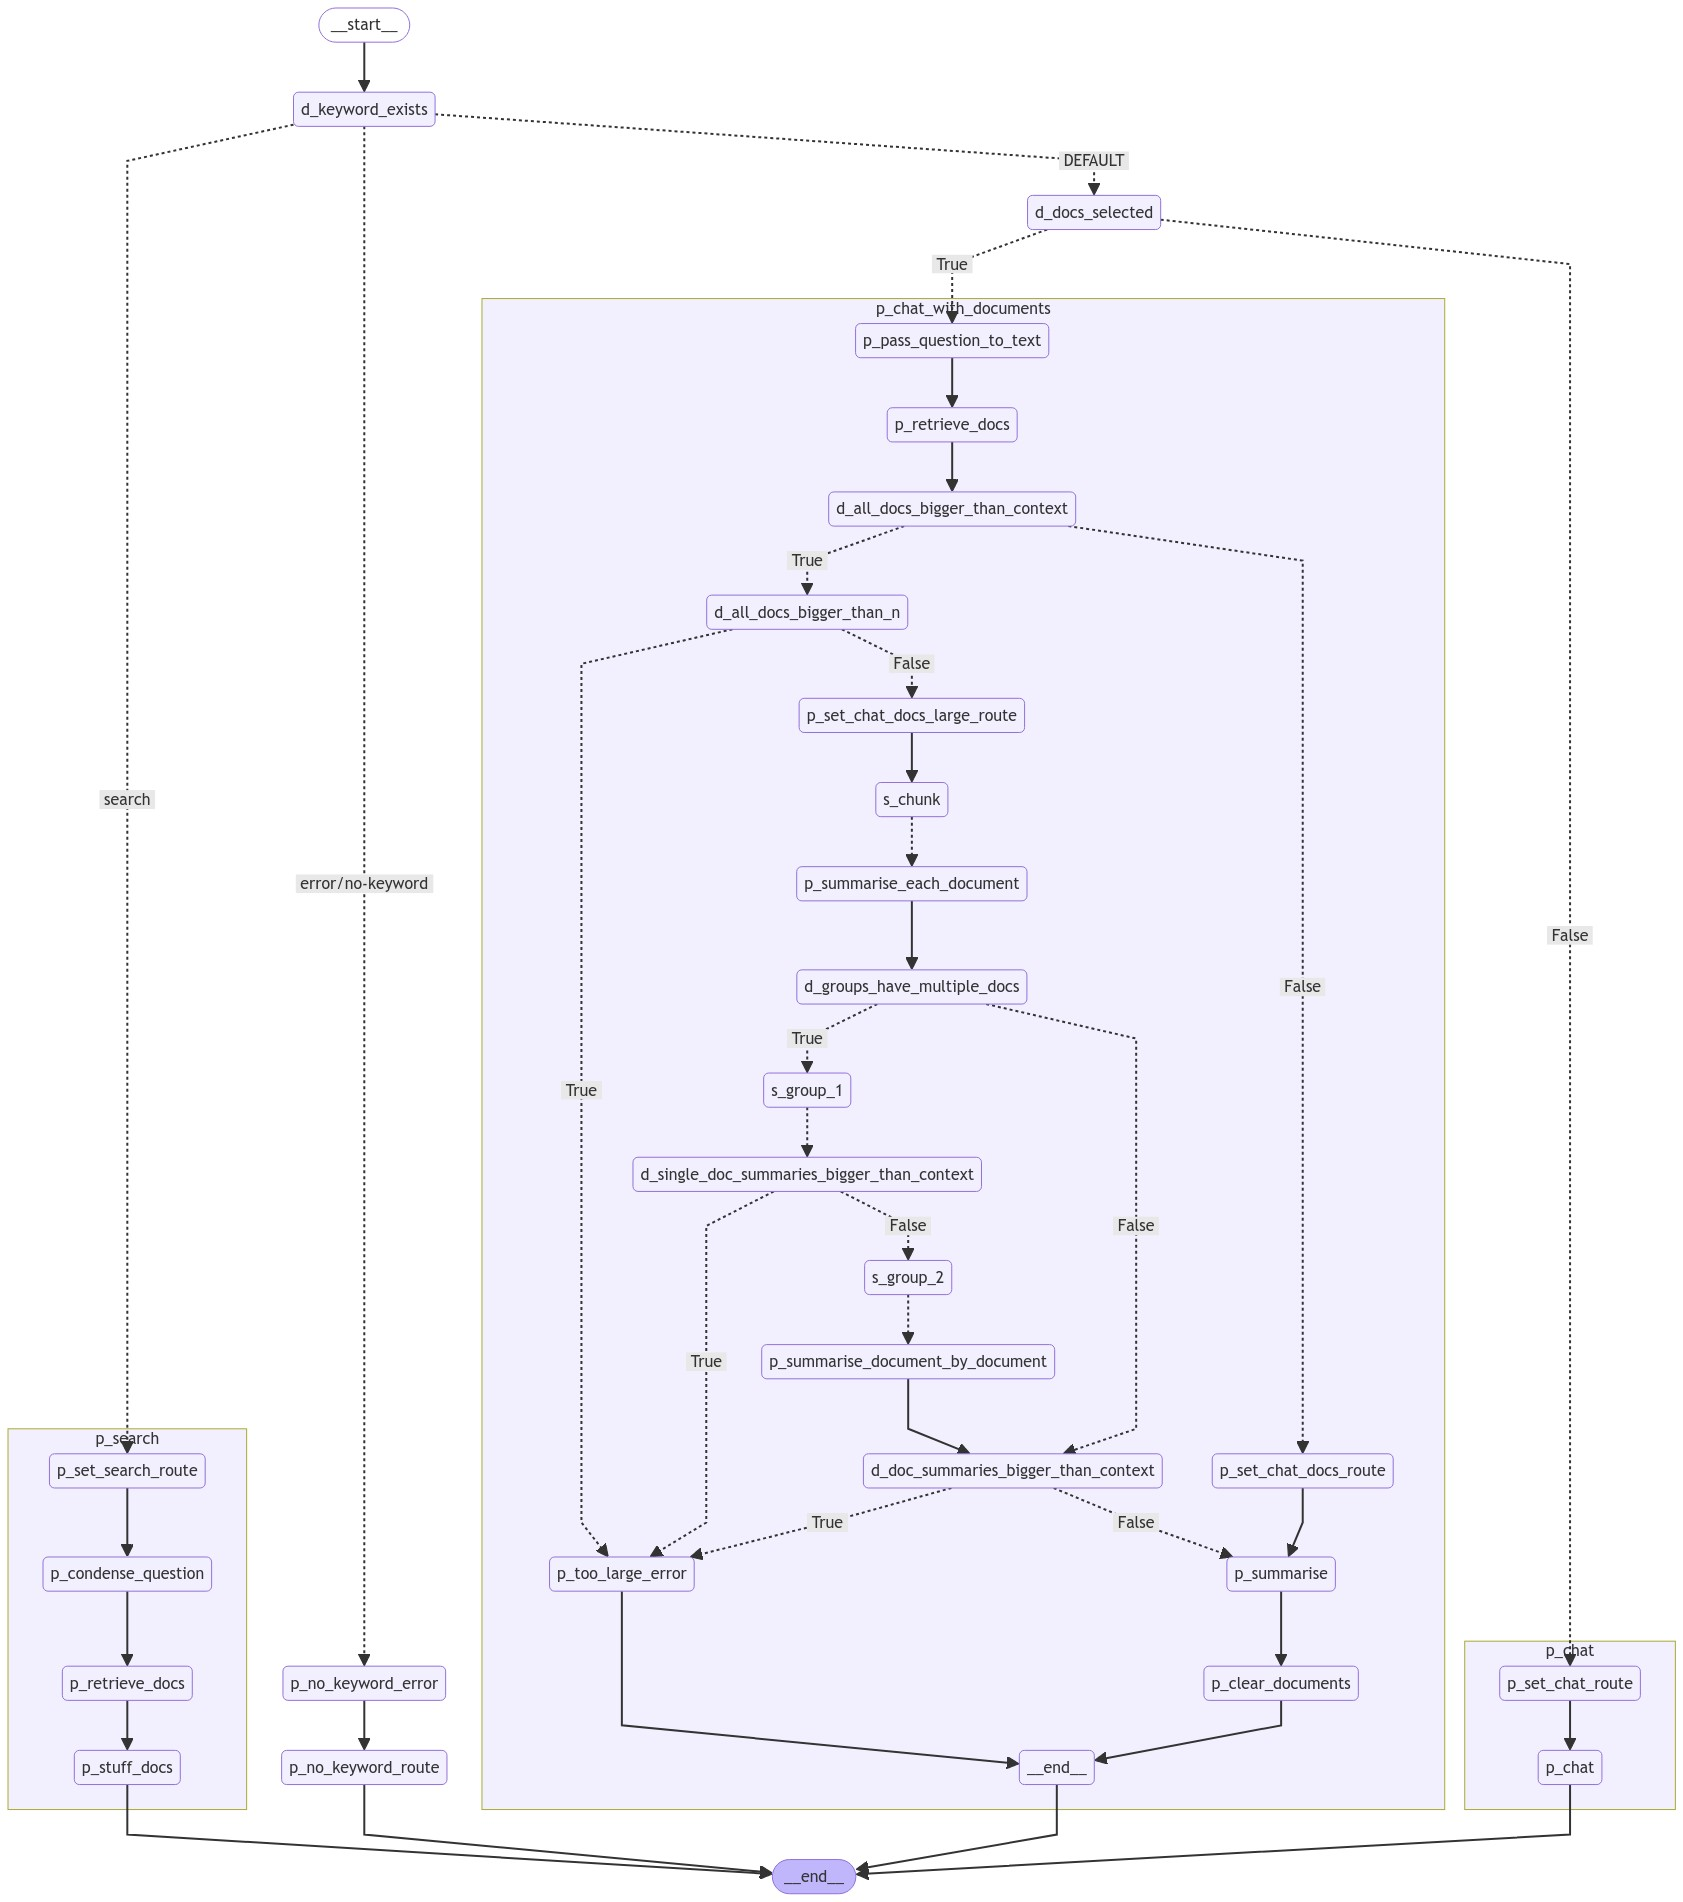

In [10]:
from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod

display(
    Image(
        app.get_graph(xray=True).draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)